In [1]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_csv("CostBreakdownYear.csv")
data.columns = ['Company', 'Category', 'Cost','Month','Year']
data=data[data['Year'] == 2015].reset_index(drop = True)

labor = data[data['Category'] == 'L'].reset_index(drop = True)
material = data[data['Category'] == 'M'].reset_index(drop = True)
equipment = data[data['Category'] == 'E'].reset_index(drop = True)
other = data[data['Category'] == 'O'].reset_index(drop = True)

laborM = pd.DataFrame(labor.groupby('Month').mean()['Cost'], columns =['Cost'])
materialM = pd.DataFrame(material.groupby('Month').mean()['Cost'], columns =['Cost'])
equipmentM = pd.DataFrame(equipment.groupby('Month').mean()['Cost'], columns =['Cost'])
otherM = pd.DataFrame(other.groupby('Month').mean()['Cost'], columns =['Cost'])

def BasicStats(datain):
    print('Max: '+str(datain['Cost'].max()))
    print('Min: '+str(datain['Cost'].min()))
    print('Mean: '+str(datain['Cost'].mean()))
    print('Std: '+str(datain['Cost'].std()))
    
data 


,Company,Category,Cost,Month,Year
0,15,E,161128.92,1,2015
1,15,E,134194.52,2,2015
2,15,E,96511.05,3,2015
3,15,E,112334.43,4,2015
4,15,E,112557.62,5,2015
...,...,...,...,...,...
5988,1393,O,75977.72,8,2015
5989,1393,O,54120.56,9,2015
5990,1393,O,149122.52,10,2015
5991,1393,O,166296.53,11,2015


All Costs
Max: 210506925.56
Min: 0.01
Mean: 1792742.5224945752
Std: 6719122.002641231


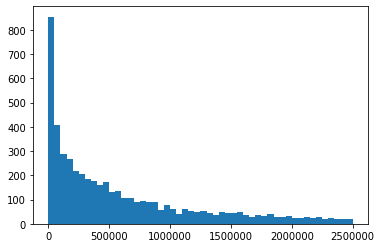

In [2]:
plt.hist(data['Cost'], bins = 50, range = [0, 2500000])
print('All Costs')
BasicStats(data)

All Costs (Monthly)
Max: 2516289.688076154
Min: 1140147.7027021286
Mean: 1784293.8489947487
Std: 425959.51288747805


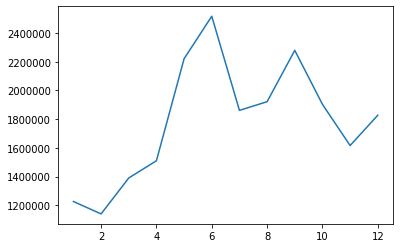

In [3]:
dataM = pd.DataFrame(data.groupby('Month').mean()['Cost'], columns =['Cost'])
plt.plot(dataM['Cost'])
print('All Costs (Monthly)')
BasicStats(dataM)

Labor Costs
Max: 76217105.96
Min: 20.0
Mean: 2134917.074813682
Std: 4254693.84343904


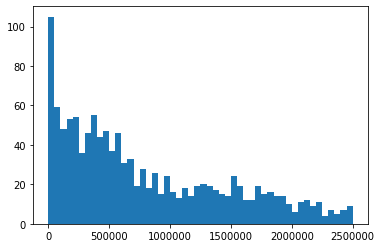

In [4]:
plt.hist(labor['Cost'], bins = 50, range = [0, 2500000])
print('Labor Costs')
BasicStats(labor)

Material Costs
Max: 210506925.56
Min: 0.01
Mean: 2829814.545492291
Std: 11278695.202164512


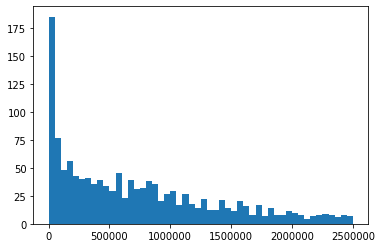

In [5]:
plt.hist(material['Cost'], bins = 50, range = [0, 2500000])
print('Material Costs')
BasicStats(material)

Equipment Costs
Max: 17323643.45
Min: 48.75
Mean: 581985.6071733962
Std: 1258615.36057338


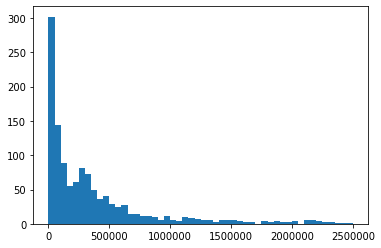

In [6]:
plt.hist(equipment['Cost'], bins = 50, range = [0, 2500000])
print('Equipment Costs')
BasicStats(equipment)

Other Costs
Max: 41667487.97
Min: 0.16
Mean: 1238757.3136318398
Std: 3796789.1586728822


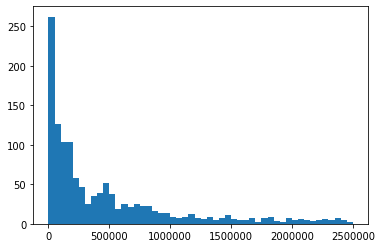

In [7]:
plt.hist(other['Cost'], bins = 50, range = [0, 2500000])
print('Other Costs')
BasicStats(other)

Labor Costs (Monthly)
Max: 2970516.1551111112
Min: 1566753.7455384627
Mean: 2129159.5248507163
Std: 398758.2821582061


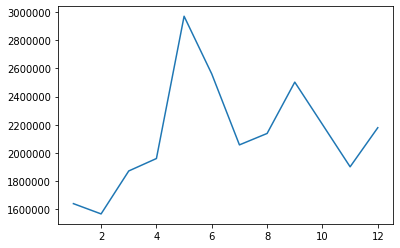

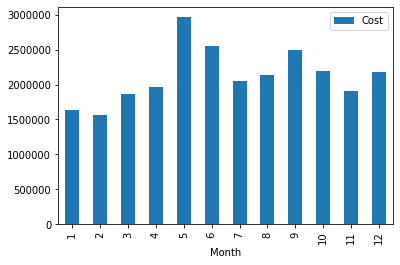

In [8]:
plt.plot(laborM['Cost'])
laborM.plot.bar(y = 'Cost')
print('Labor Costs (Monthly)')
BasicStats(laborM)

Material Costs (Monthly)
Max: 4537755.391134753
Min: 1450607.0306818183
Mean: 2810821.88413392
Std: 952265.6349609935


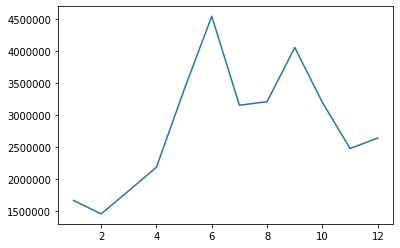

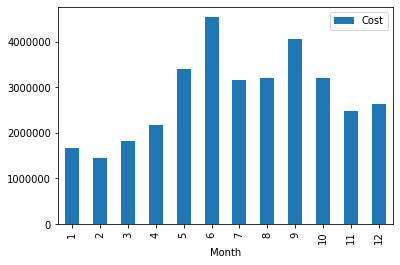

In [9]:
plt.plot(materialM['Cost'])
materialM.plot.bar(y = 'Cost')
print('Material Costs (Monthly)')
BasicStats(materialM)

Equipment Costs (Monthly)
Max: 872623.5143137254
Min: 400245.0125490196
Mean: 580265.4646744212
Std: 133802.9946309232


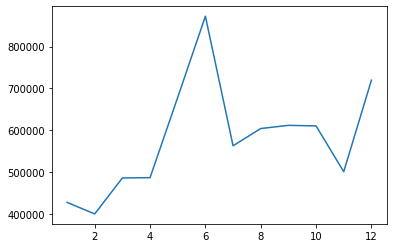

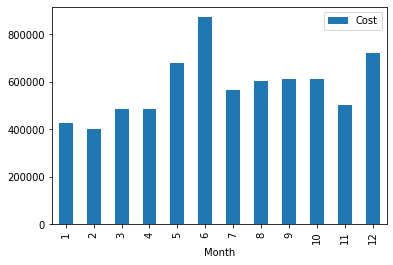

In [10]:
plt.plot(equipmentM['Cost'])
equipmentM.plot.bar(y = 'Cost')
print('Equipment Costs (Monthly)')
BasicStats(equipmentM)

Other Costs (Monthly)
Max: 1497786.1203053433
Min: 920553.3312499999
Mean: 1231125.6789400384
Std: 183727.06610899922


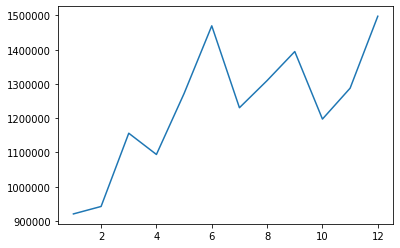

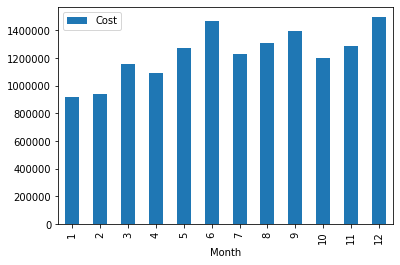

In [11]:
plt.plot(otherM['Cost'])
otherM.plot.bar(y = 'Cost')
print('Other Costs (Monthly)')
BasicStats(otherM)

In [12]:
combined = pd.DataFrame({
    'Material': materialM['Cost'].to_numpy(),
    'Labor': laborM['Cost'].to_numpy(),
    'Other': otherM['Cost'].to_numpy(),
    'Equipment': equipmentM['Cost'].to_numpy(),
    },
    index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
combined

,Material,Labor,Other,Equipment
Jan,1.662194e+06,1.639731e+06,9.205533e+05,427816.116735
Feb,1.450607e+06,1.566754e+06,9.423237e+05,400245.012549
Mar,1.811510e+06,1.871849e+06,1.156192e+06,486138.615784
Apr,2.179634e+06,1.960130e+06,1.094138e+06,486840.440392
May,3.388126e+06,2.970516e+06,1.272196e+06,678841.994059
Jun,4.537755e+06,2.560583e+06,1.469805e+06,872623.514314
Jul,3.147823e+06,2.057010e+06,1.230642e+06,563106.691923
Aug,3.203545e+06,2.138167e+06,1.309970e+06,604274.120762
Sep,4.049889e+06,2.502600e+06,1.394714e+06,611898.345093
Oct,3.190909e+06,2.202195e+06,1.197503e+06,610484.791835


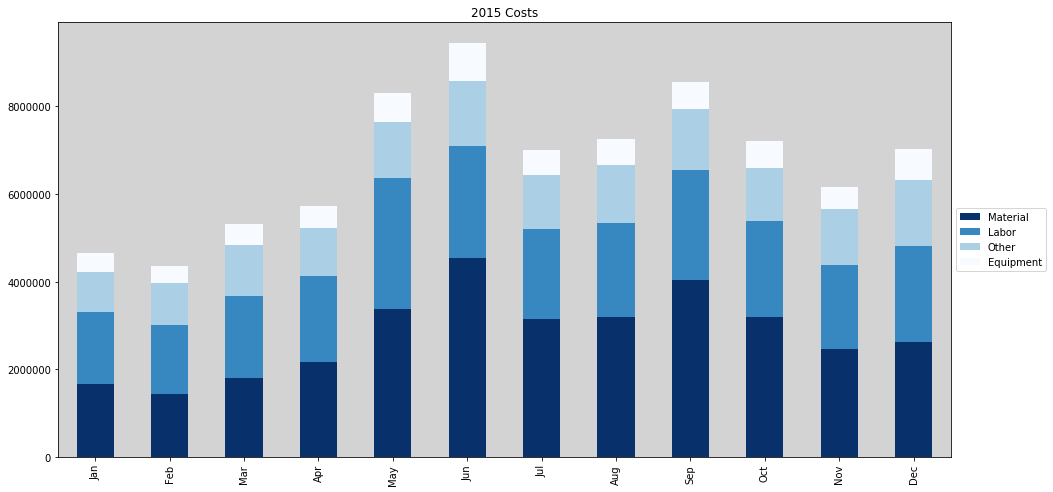

In [23]:
myplt = combined.plot(kind='bar', stacked=True, figsize=(16,8), colormap = 'Blues_r', title = "2015 Costs")
myplt.set_facecolor('lightgray')
myplt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
savethis = myplt.get_figure()
savethis.savefig('2015Costs.png')

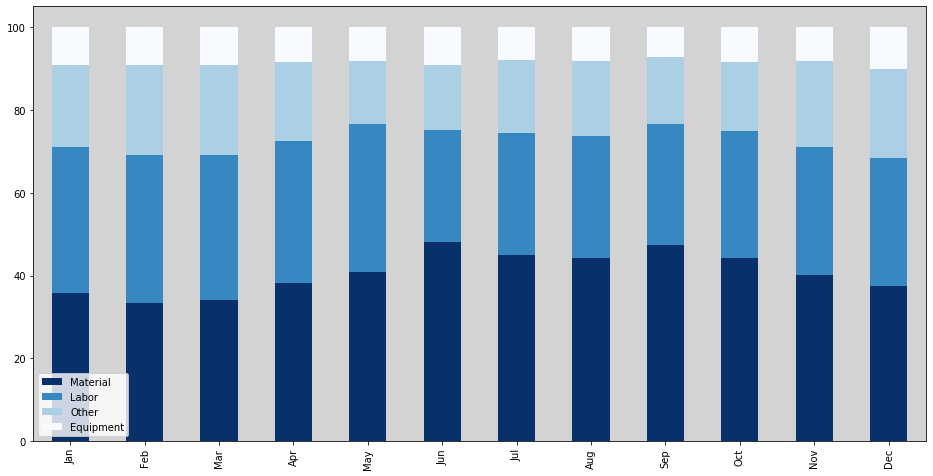

In [14]:
combinedpercent = combined.apply(lambda x: x*100/sum(x), axis=1)
combinedpercent.plot(kind="bar", stacked=True, figsize=(16,8), colormap = 'Blues_r').set_facecolor('lightgray')

In [15]:
combinedpercent

,Material,Labor,Other,Equipment
Jan,35.743848,35.260793,19.795594,9.199765
Feb,33.271341,35.935300,21.613279,9.180080
Mar,34.014557,35.147538,21.709723,9.128182
Apr,38.100539,34.263566,19.125802,8.510093
May,40.773240,35.747658,15.309811,8.169291
Jun,48.065538,27.122617,15.568703,9.243142
Jul,44.978020,29.391809,17.584159,8.046012
Aug,44.150556,29.467750,18.053719,8.327975
Sep,47.316754,29.239051,16.295100,7.149096
Oct,44.311453,30.581409,16.629468,8.477670
